In [1178]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [1179]:
df = pd.read_csv('used_car_dataset.csv')


In [1180]:
df

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [1181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [1182]:
df.duplicated().sum()

92

In [1183]:
df_modified = df.copy(deep=True)

In [1184]:
df_modified.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [1185]:
df_modified = df_modified.drop_duplicates(keep='last')
df_modified = df_modified.reset_index(drop=True)

In [1186]:
df_modified[~((df_modified['car_price_in_rupees'].str.contains('Lakh')) | (df_modified['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
458,Tata Indica V2 DLE BS-III,"₹ 60,000","50,000 km",Diesel,Pallikarnai,2007
1544,Maruti Suzuki Estilo LXi,"₹ 99,991","29,012 km",Petrol,Kolkata,2008


In [1187]:
df_modified.loc[458,'car_price_in_rupees'] = '0.6 Lakh'

In [1188]:
df_modified.loc[1544, 'car_price_in_rupees'] = '0.99 Lakh'

In [1189]:
df_modified[~((df_modified['car_price_in_rupees'].str.contains('Lakh')) | (df_modified['car_price_in_rupees'].str.contains('Crore')))]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture


In [1190]:
#to convert string to float
def convert_price(price):
    # Remove ₹ symbol and split the string
    price_parts = price.replace('₹', '').split()
    

    if 'Crore' in price_parts:
        return float(price_parts[0]) * 10000000
    elif 'Lakh' in price_parts:
        # Extract numeric value
        return float(price_parts[0]) * 100000
    else:
        return None

In [1191]:
df_modified['car_price_numeric'] = df_modified['car_price_in_rupees'].apply(convert_price)

In [1192]:
df_modified.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0


In [1193]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'Diesel + 1', 'Electric', 'CNG', 'Petrol + 1',
       'Hybrid', 'LPG'], dtype=object)

In [1194]:
df['fuel_type'].value_counts()

fuel_type
Petrol        1348
Diesel         636
CNG             82
Petrol + 1      18
Electric        10
Diesel + 1       7
Hybrid           2
LPG              2
Name: count, dtype: int64

Text(0.5, 1.0, 'Count of fuels')

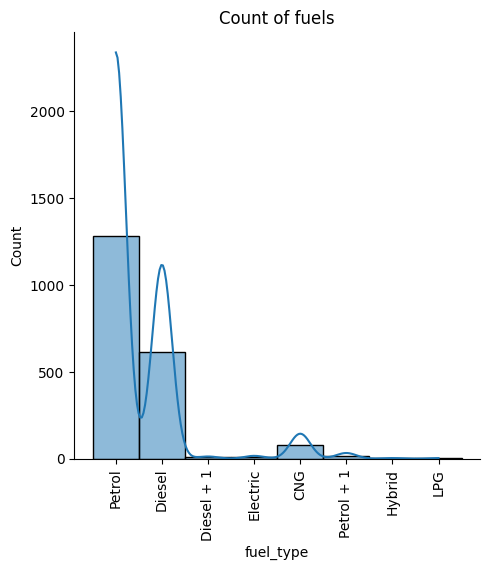

In [1195]:
sns.displot(x='fuel_type',data = df_modified,kde=True)
plt.xticks(rotation=90)
plt.title('Count of fuels')

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

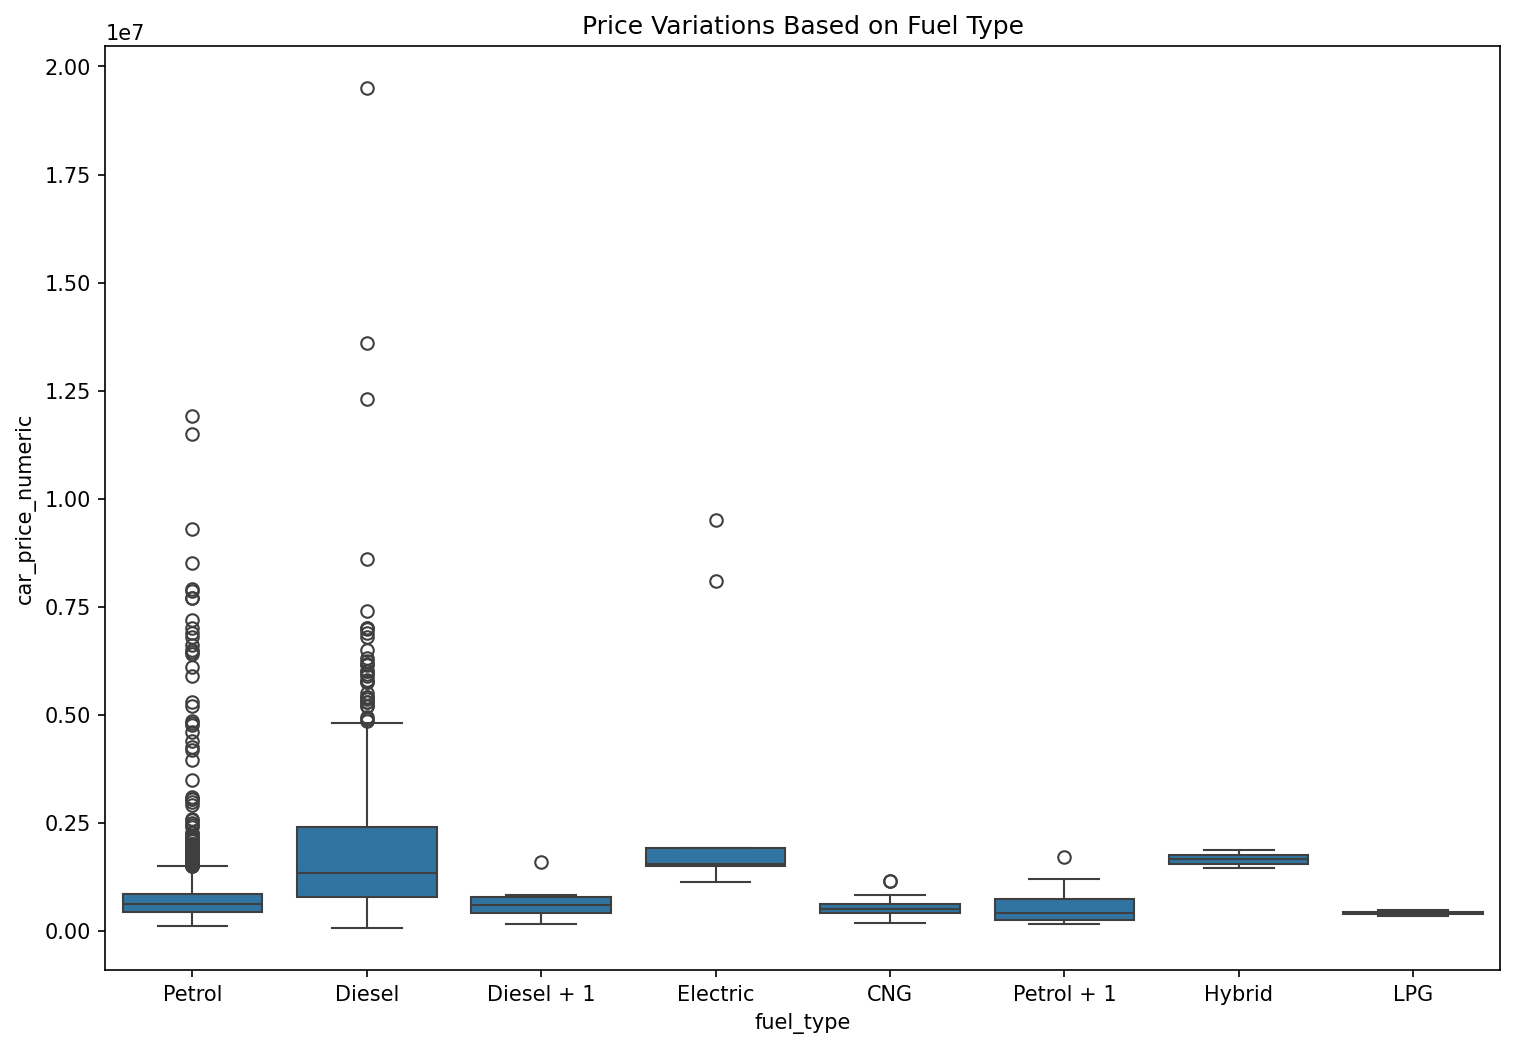

In [1196]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='fuel_type',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [1197]:
#Top 3 fuels, remaining are others
def fuel_type(fuel):
    if fuel not in ['Petrol', 'Diesel', 'CNG']:
        fuel = "Other"
    return fuel

In [1198]:
df_modified['Top_fuels'] = df_modified['fuel_type'].apply(fuel_type)

Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

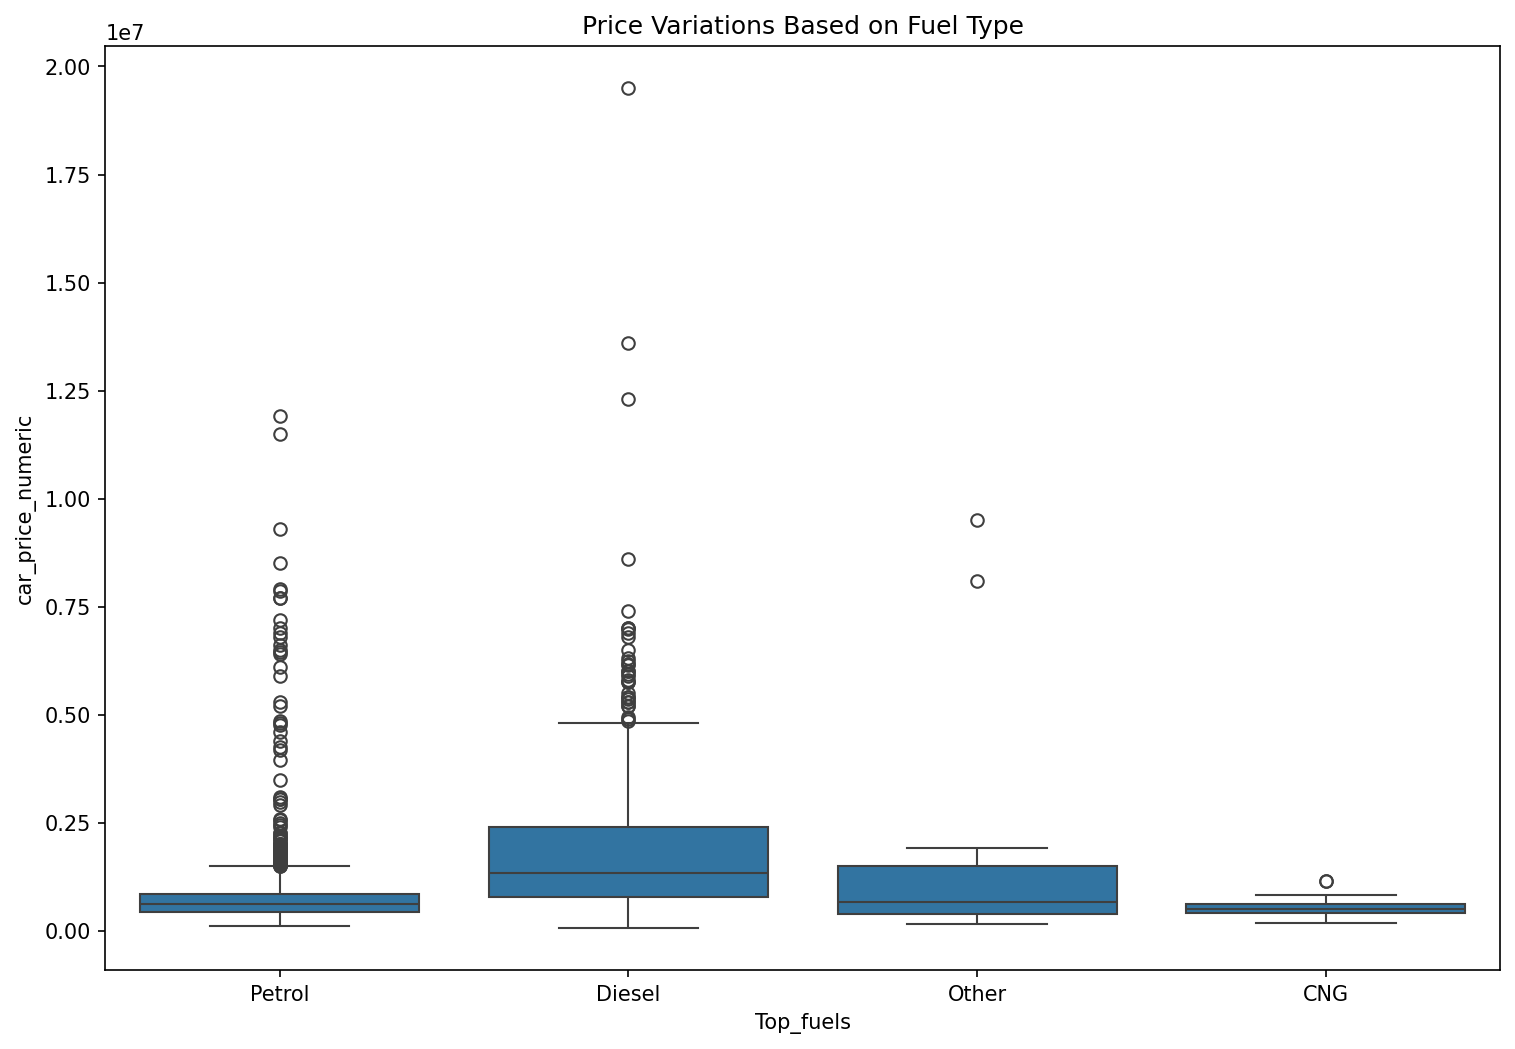

In [1199]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_fuels',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [1200]:
df_modified[(df_modified['Top_fuels'] == 'Diesel') & (df_modified['car_price_numeric'] > 17500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels
1306,Land Rover Range Rover 4.4 SDV8 Autobiography LWB,₹ 1.95 Crore,"45,000 km",Diesel,Ahmedabad,2018,19500000.0,Diesel


In [1201]:
df_modified.drop(1306, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [1202]:
df_modified[(df_modified['Top_fuels'] == 'Diesel') & (df_modified['car_price_numeric'] > 17500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels


Text(0.5, 1.0, 'Price Variations Based on Fuel Type')

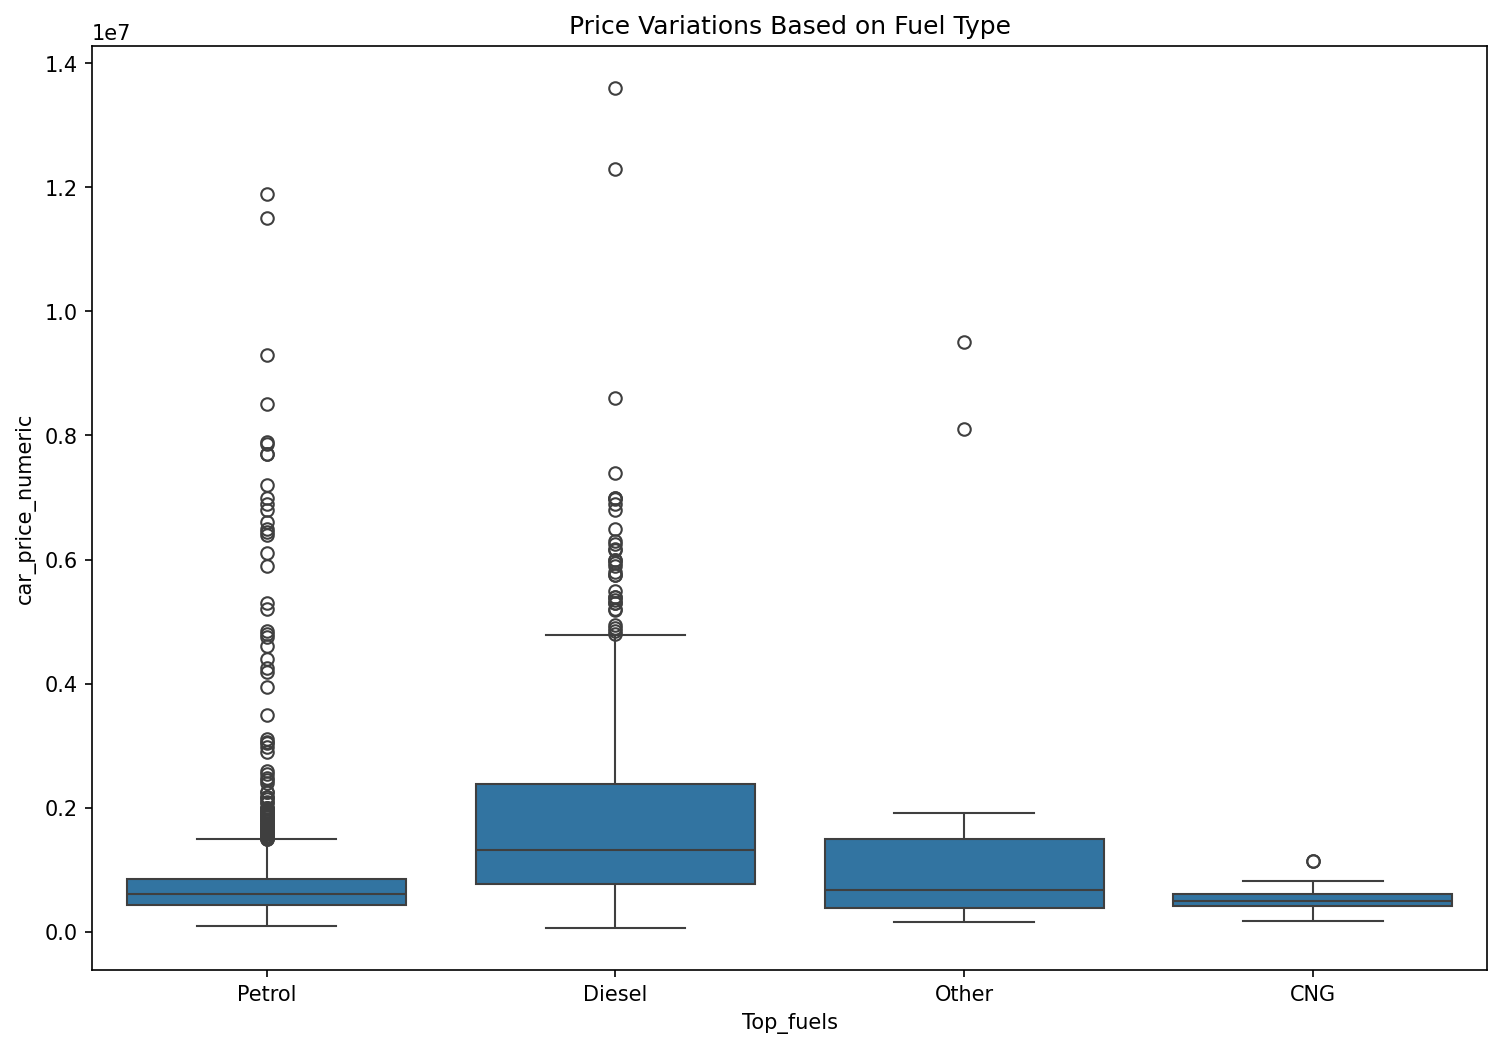

In [1203]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_fuels',y='car_price_numeric',data=df_modified)
plt.title("Price Variations Based on Fuel Type")

In [1204]:
df_modified['kms_driven_numeric'] = df_modified['kms_driven'].str.replace(',', '').str.replace('km', '').astype(dtype=int)

In [1205]:
df_modified

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016,445000.0,Petrol,22402
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019,293000.0,Petrol,10344
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021,2249000.0,Diesel,12999
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016,695000.0,Petrol,45000
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019,1200000.0,Petrol,11193
...,...,...,...,...,...,...,...,...,...
2007,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015,360000.0,Diesel,42158
2008,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013,2200000.0,Diesel,68862
2009,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018,838000.0,Petrol,37622
2010,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017,675000.0,Petrol,64726


<Axes: xlabel='year_of_manufacture', ylabel='car_price_numeric'>

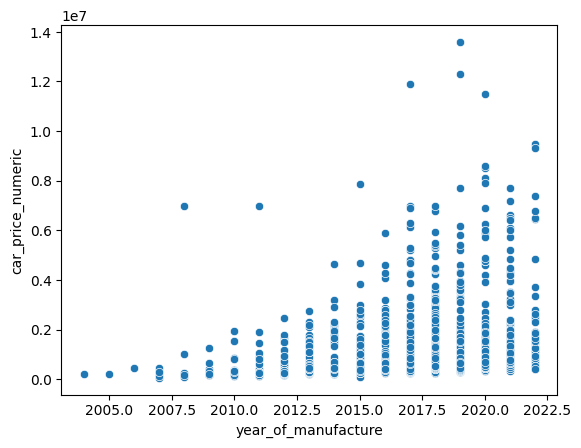

In [1206]:
sns.scatterplot(data=df_modified, x='year_of_manufacture', y='car_price_numeric')

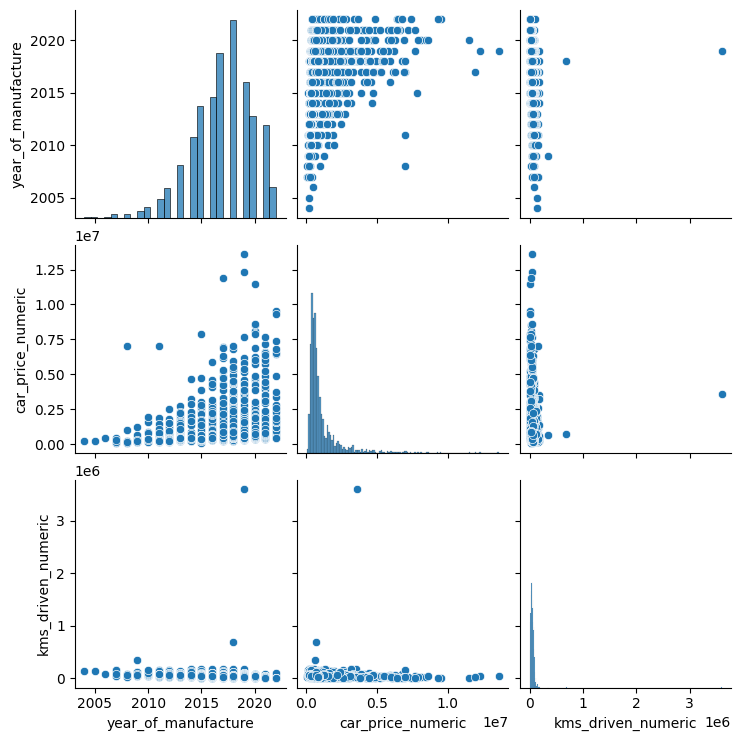

In [1207]:
sns.pairplot(df_modified)

In [1208]:
df_modified[(df_modified['kms_driven_numeric'] > 3000000) & (df_modified['car_price_numeric'] > 2500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
394,BMW 3 Series GT 320d Luxury Line [2014-2016],₹ 36 Lakh,"36,00,000 km",Diesel,Pune,2019,3600000.0,Diesel,3600000


In [1209]:
df_modified.drop(394, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

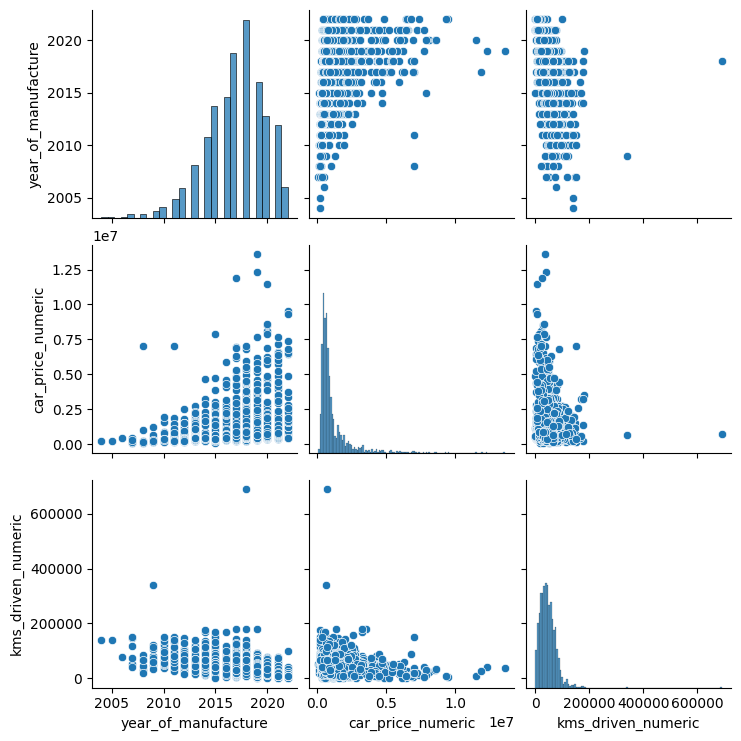

In [1210]:
sns.pairplot(df_modified)

In [1211]:
df_modified[(df_modified['kms_driven_numeric'] > 600000) & (df_modified['car_price_numeric'] < 2500000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
1165,Maruti Suzuki Baleno Zeta Automatic,₹ 6.9 Lakh,"6,90,000 km",Petrol,Thane,2018,690000.0,Petrol,690000


In [1212]:
df_modified.drop(1165, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

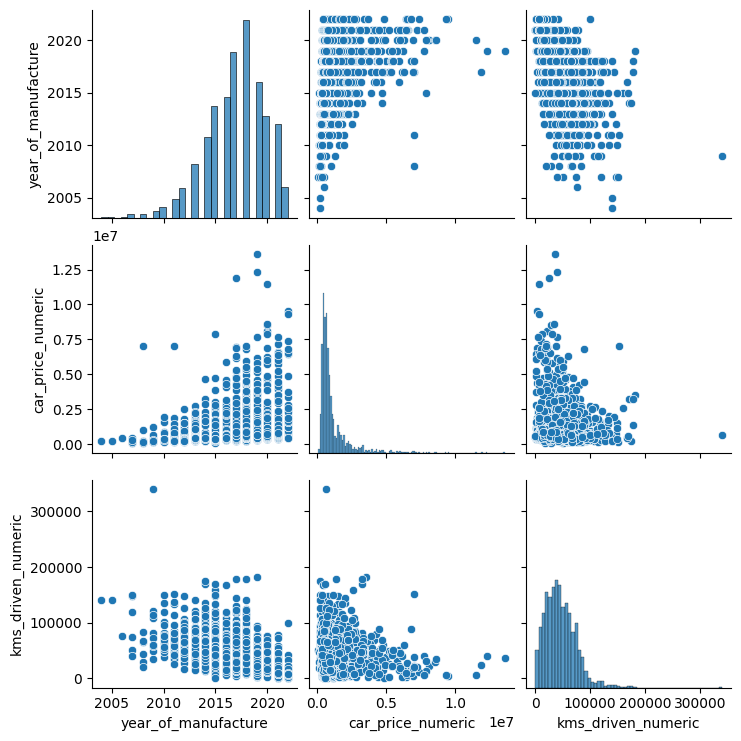

In [1213]:
sns.pairplot(df_modified)

In [1214]:
df_modified[df_modified['kms_driven_numeric'] > 300000]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric
871,Toyota Innova 2.5 G2,₹ 6.5 Lakh,"3,40,000 km",Diesel,Pallikarnai,2009,650000.0,Diesel,340000


In [1215]:
df_modified.drop(871, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [1216]:
df_modified['city'].unique()

array(['Mumbai', 'Kolkata', 'Bangalore', 'Thane', 'Chennai', 'Ahmedabad',
       'Pallikarnai', 'Hyderabad', 'Pune', 'Gurgaon', 'Delhi', 'Noida',
       'Faridabad', 'Thiruvallur', 'Ambattur', 'Poonamallee'],
      dtype=object)

In [1217]:
df_modified['city'].value_counts()


city
Bangalore      240
Hyderabad      240
Thane          238
Ahmedabad      238
Kolkata        234
Mumbai         232
Pune           224
Delhi          174
Chennai         75
Noida           40
Ambattur        19
Pallikarnai     16
Thiruvallur     16
Gurgaon          8
Poonamallee      8
Faridabad        7
Name: count, dtype: int64

In [1218]:
def cityfilter(city):
  lis =  ['Bangalore', 'Hyderabad', 'Thane', 'Ahmedabad', 'Kolkata', 'Mumbai', 'Pune', 'Delhi', 'Chennai']
  if city in lis:
    return city
  else:
    return 'Other'

In [1219]:
df_modified['Top_city'] = df_modified['city'].apply(cityfilter)

<Axes: xlabel='Top_city', ylabel='car_price_numeric'>

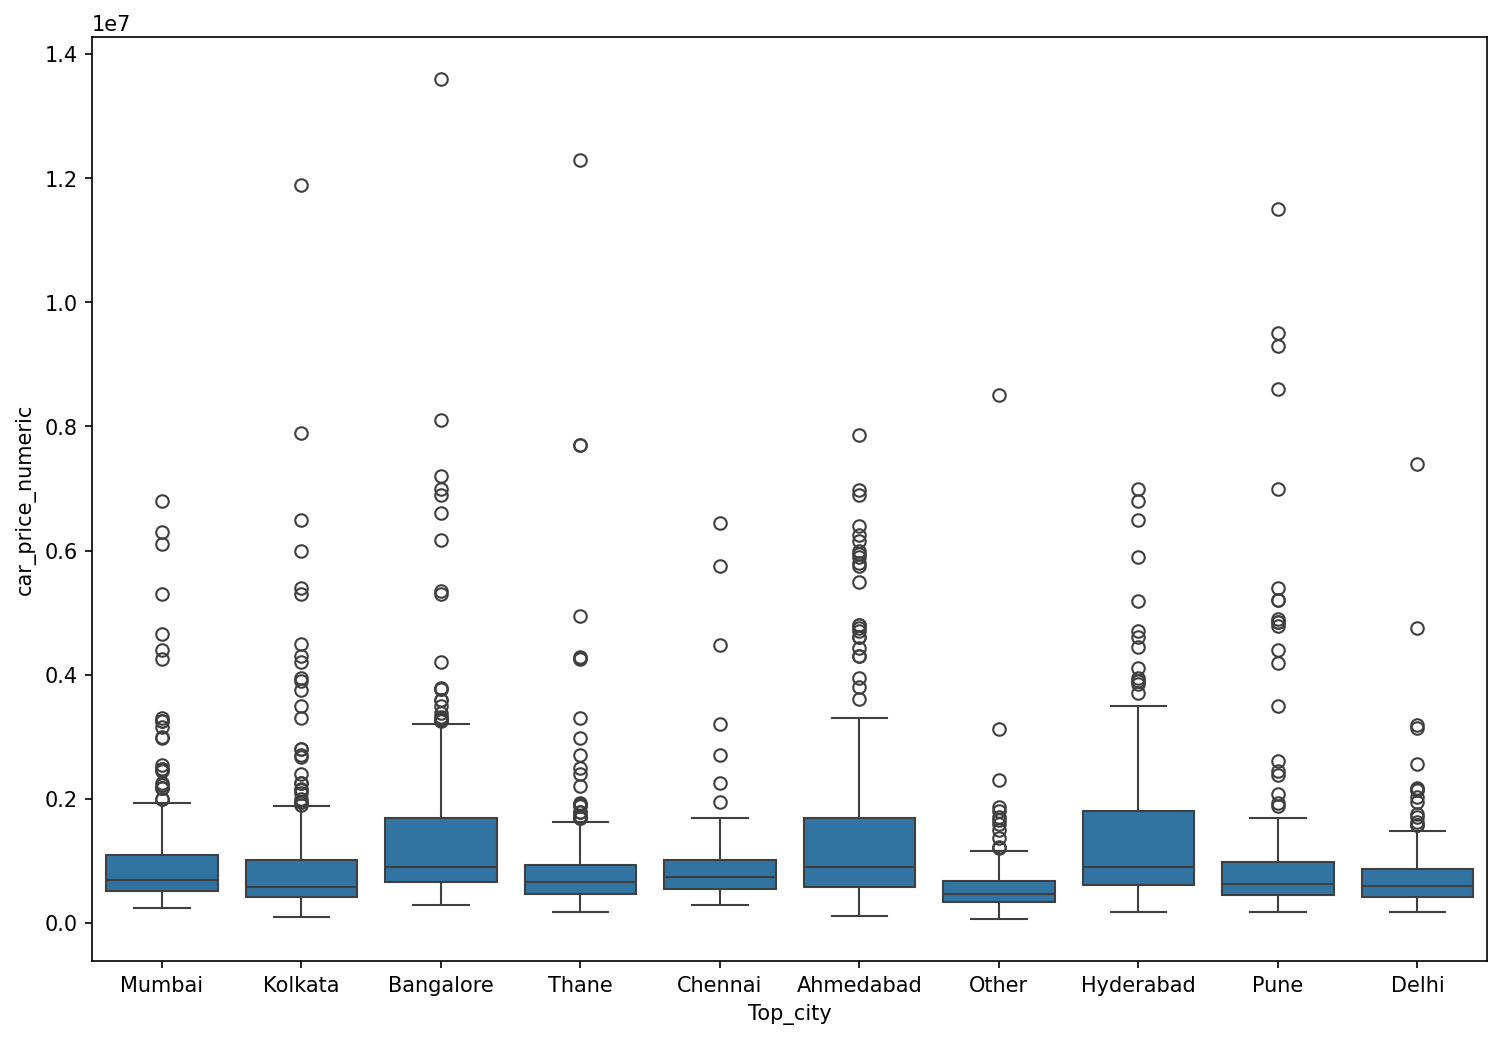

In [1220]:
plt.figure(figsize=(12,8),dpi=150)
sns.boxplot(x='Top_city',y='car_price_numeric',data=df_modified)

In [1221]:
df_modified[(df_modified['Top_city'] == 'Bangalore') & (df_modified['car_price_numeric'] > 12000000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric,Top_city
1754,Land Rover Range Rover Sport SE 3.0 Diesel [20...,₹ 1.36 Crore,"36,000 km",Diesel,Bangalore,2019,13600000.0,Diesel,36000,Bangalore


In [1222]:
df_modified.drop(1754, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [1223]:
df_modified[(df_modified['Top_city'] == 'Thane') & (df_modified['car_price_numeric'] > 12000000)]

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture,car_price_numeric,Top_fuels,kms_driven_numeric,Top_city
286,Land Rover Range Rover Sport SDV6 SE,₹ 1.23 Crore,"39,012 km",Diesel,Thane,2019,12300000.0,Diesel,39012,Thane


In [1224]:
df_modified.drop(286, inplace=True)
df_modified.reset_index(drop=True, inplace=True)

In [1225]:
def Type_of_Car(price):
  if price <= 800000:
    return 'Budget'
  elif price > 800000 and price <= 2000000:
    return 'MidRange'
  elif price >2000000 and price < 10000000:
    return 'Luxury'
  else:
      return 'UltraLuxury'

In [1226]:
df_modified['Category'] = df_modified['car_price_numeric'].apply(Type_of_Car)

In [1227]:
def brand_name(brand):
    return brand.split()[0]


In [1228]:
df_modified['brand'] = df_modified['car_name'].apply(brand_name)

In [1229]:
df_modified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2007 entries, 0 to 2006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_name             2007 non-null   object 
 1   car_price_in_rupees  2007 non-null   object 
 2   kms_driven           2007 non-null   object 
 3   fuel_type            2007 non-null   object 
 4   city                 2007 non-null   object 
 5   year_of_manufacture  2007 non-null   int64  
 6   car_price_numeric    2007 non-null   float64
 7   Top_fuels            2007 non-null   object 
 8   kms_driven_numeric   2007 non-null   int32  
 9   Top_city             2007 non-null   object 
 10  Category             2007 non-null   object 
 11  brand                2007 non-null   object 
dtypes: float64(1), int32(1), int64(1), object(9)
memory usage: 180.4+ KB


Text(0.5, 1.0, 'Count of all Brands')

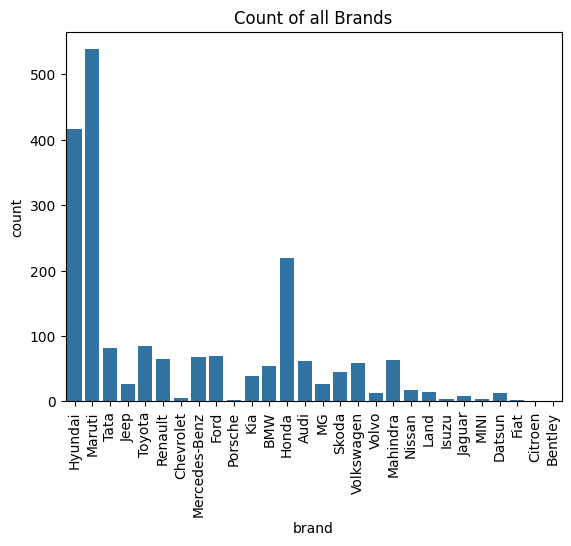

In [1230]:
sns.countplot(data=df_modified,x='brand')
plt.xticks(rotation=90)
plt.title('Count of all Brands')

In [1231]:
df_modified['brand'].value_counts()

brand
Maruti           538
Hyundai          417
Honda            220
Toyota            85
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               54
Skoda             45
Kia               39
MG                26
Jeep              26
Nissan            18
Land              15
Volvo             13
Datsun            13
Jaguar             9
Chevrolet          6
Isuzu              4
MINI               4
Fiat               3
Porsche            2
Citroen            1
Bentley            1
Name: count, dtype: int64

In [1232]:
df_modified = df_modified[df_modified['brand'].apply(lambda x: df_modified['brand'].value_counts().get(x, 0) > 20)]

In [1233]:
df_modified['brand'].value_counts()

brand
Maruti           538
Hyundai          417
Honda            220
Toyota            85
Tata              81
Ford              69
Mercedes-Benz     68
Renault           65
Mahindra          64
Audi              62
Volkswagen        59
BMW               54
Skoda             45
Kia               39
Jeep              26
MG                26
Name: count, dtype: int64

In [1234]:
X = df_modified.drop(['car_name','car_price_in_rupees','kms_driven','fuel_type','city'],axis=1)
y = df_modified['car_price_numeric']

In [1235]:
X = pd.get_dummies(X, columns=['brand', 'Top_fuels','Top_city','Category'], drop_first=True)  # One-hot encoding


Text(0.5, 1.0, 'Correlation Heatmap')

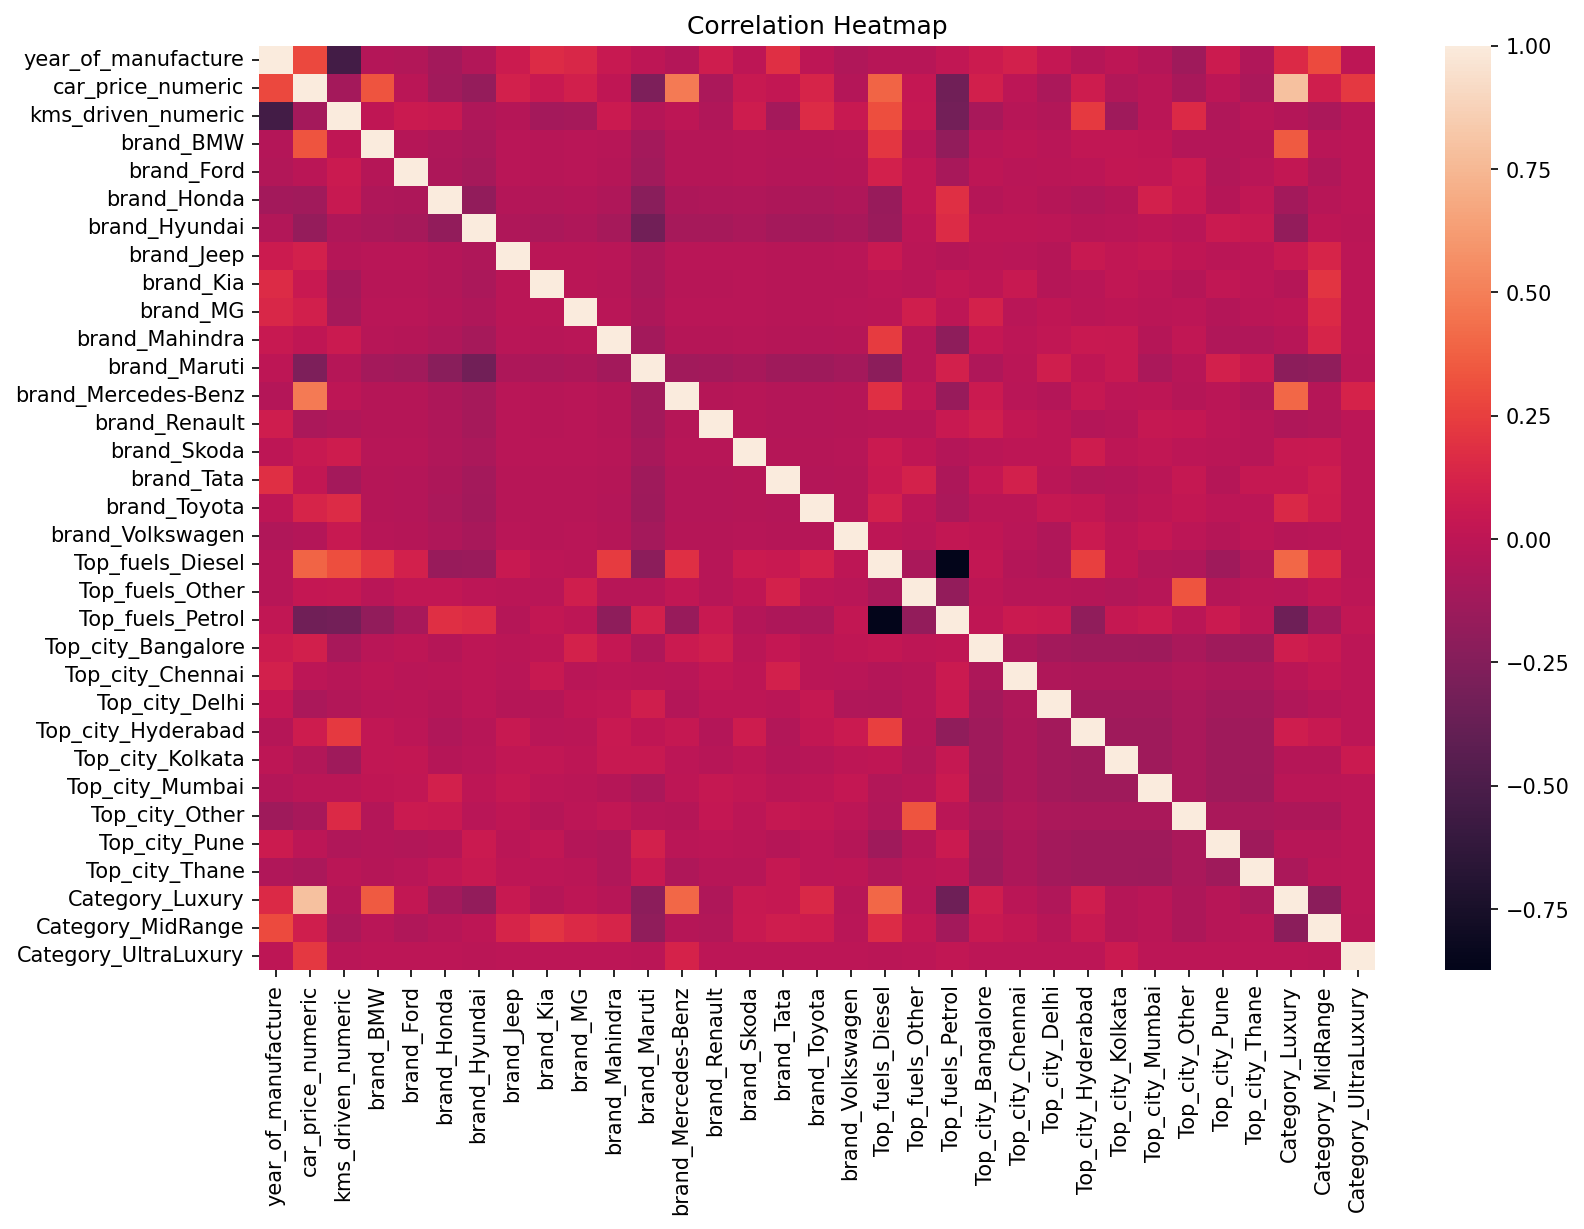

In [1236]:
plt.figure(figsize=(12,8),dpi=150)
sns.heatmap(X.corr())
plt.title('Correlation Heatmap')

In [1237]:
X.corr()['car_price_numeric'].sort_values(ascending=False)

car_price_numeric       1.000000
Category_Luxury         0.794764
brand_Mercedes-Benz     0.477393
Top_fuels_Diesel        0.385341
brand_BMW               0.330215
year_of_manufacture     0.288914
Category_UltraLuxury    0.219415
brand_Toyota            0.123023
brand_Jeep              0.103078
brand_MG                0.097786
Top_city_Bangalore      0.097054
Category_MidRange       0.086318
Top_city_Hyderabad      0.074126
brand_Kia               0.053762
brand_Skoda             0.041420
Top_fuels_Other         0.032483
brand_Tata              0.019950
brand_Mahindra          0.009927
Top_city_Chennai       -0.003164
Top_city_Pune          -0.007915
Top_city_Mumbai        -0.013784
brand_Ford             -0.015084
brand_Volkswagen       -0.042933
Top_city_Kolkata       -0.047457
Top_city_Thane         -0.080440
brand_Renault          -0.080756
Top_city_Delhi         -0.081507
Top_city_Other         -0.097431
kms_driven_numeric     -0.107717
brand_Honda            -0.119782
brand_Hyun

In [1238]:
abs(X.corr()['car_price_numeric'].sort_values(ascending=False))

car_price_numeric       1.000000
Category_Luxury         0.794764
brand_Mercedes-Benz     0.477393
Top_fuels_Diesel        0.385341
brand_BMW               0.330215
year_of_manufacture     0.288914
Category_UltraLuxury    0.219415
brand_Toyota            0.123023
brand_Jeep              0.103078
brand_MG                0.097786
Top_city_Bangalore      0.097054
Category_MidRange       0.086318
Top_city_Hyderabad      0.074126
brand_Kia               0.053762
brand_Skoda             0.041420
Top_fuels_Other         0.032483
brand_Tata              0.019950
brand_Mahindra          0.009927
Top_city_Chennai        0.003164
Top_city_Pune           0.007915
Top_city_Mumbai         0.013784
brand_Ford              0.015084
brand_Volkswagen        0.042933
Top_city_Kolkata        0.047457
Top_city_Thane          0.080440
brand_Renault           0.080756
Top_city_Delhi          0.081507
Top_city_Other          0.097431
kms_driven_numeric      0.107717
brand_Honda             0.119782
brand_Hyun

In [1239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1240]:
from sklearn.preprocessing import StandardScaler

In [1241]:
scaler = StandardScaler()

In [1242]:
scaler.fit(X_train)

StandardScaler()

In [1243]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [1244]:
from sklearn.linear_model import ElasticNet

In [1245]:
model = ElasticNet(max_iter=1000000)

In [1246]:
param_grid = {'alpha':[0.1,1,5,10],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [1247]:
from sklearn.model_selection import GridSearchCV

In [1248]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [1249]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=ElasticNet(max_iter=1000000),
             param_grid={'alpha': [0.1, 1, 5, 10],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [1250]:
grid_model.best_params_

{'alpha': 10, 'l1_ratio': 1}

In [1251]:
grid_model.best_estimator_

ElasticNet(alpha=10, l1_ratio=1, max_iter=1000000)

In [1252]:
y_pred = grid_model.predict(scaled_X_test)

In [1253]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MSE = mean_absolute_error(y_test, y_pred)


In [1254]:
np.sqrt(mean_squared_error(y_test,y_pred))

362.39327628328715

In [1255]:
from sklearn.linear_model import ElasticNetCV

In [1256]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)


In [1257]:
elastic_model.fit(scaled_X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [1258]:
test_predictions = elastic_model.predict(scaled_X_test)

In [1259]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [1260]:
MAE

7609.150457776526

In [1261]:
RMSE

11024.072624881805

In [1262]:
best_params = grid_model.best_params_
Best_Estimator = grid_model.best_estimator_
print(Best_Estimator)

print("Best Parameters:", best_params)

# Predict using the best estimator on test data
predicted_values_best = Best_Estimator.predict(scaled_X_test)
print("Predicted values for scaled test data using best estimator:", predicted_values_best)

# Evaluate the best estimator (optional)
mse_best = mean_squared_error(y_test,predicted_values_best)
print("Mean Squared Error using best estimator:", mse_best)

ElasticNet(alpha=10, l1_ratio=1, max_iter=1000000)
Best Parameters: {'alpha': 10, 'l1_ratio': 1}
Predicted values for scaled test data using best estimator: [ 734932.69200728 1011709.11188627 1094977.61722594  555144.34442706
  245072.09367667  285738.55486411  399954.82930224 1319883.6964831
  254845.6774851  2101594.13946108 1450217.56182124  224841.27705434
  556877.52029286  366820.04821123 1573971.79267568  531976.00138629
  366236.7965676  1200235.46881258  889646.2934957   298886.92166258
  500124.89156307  698984.12463063  544930.86223334  395992.32021808
  701966.69406599  344771.07265416  600067.94183651 1685061.94476396
  294778.25562276  450813.50732893  429975.7560937   687255.86735169
  657859.73131633  730752.68859756  486078.93445554  464833.99999534
  399883.00037431  394727.57736973 1699964.07751234 1444644.3562807
 3249447.33186351  334805.70236222 3951397.7894905  5898893.34742136
 6898893.48876335  599023.71152223  450342.738991    444993.54916393
 1136027.00955274

In [1264]:
np.sqrt(mse_best)

362.39327628328715